In [14]:
import tweepy
import pandas as pd

In [15]:
consumer_key = '7KSlJfGLLyqUEt4dO0tCxTCjh'
consumer_secret = 'GqUNWOjXLMOtCPPFapCLly1byc4nqCN1oKcpVcCqu6EiYCy2op'
access_token = '814760059758514176-NMORIayoPILjVQ78JN93ccahnFJGc3Y'
access_token_secret = 'wwg8ZxrVos74VaV1hDwGpUAPkcVlS4z3HHped54JmKlE8'

In [16]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Failed authentication')

Successful Authentication


In [17]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [18]:
me = api.get_user(screen_name = "madhaviksarjare")
me.id

814760059758514176

In [19]:
user_list = ["814760059758514176"]
follower_list = []
for user in user_list:
    followers = []
    try:
        for page in tweepy.Cursor(api.get_follower_ids, user_id=user).pages():
            followers.extend(page)
            print(len(followers))
    except tweepy.errors.TweepyException as e:
        print("error")
        continue
    follower_list.append(followers)

6


In [20]:
df = pd.DataFrame(columns=['source','target']) #Empty DataFrame
df['target'] = follower_list[0] #Set the list of followers as the target column
df['source'] = 1210627806 #Set my user ID as the source

In [21]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target') #Turn df into graph
pos = nx.spring_layout(G) #specify layout for visual

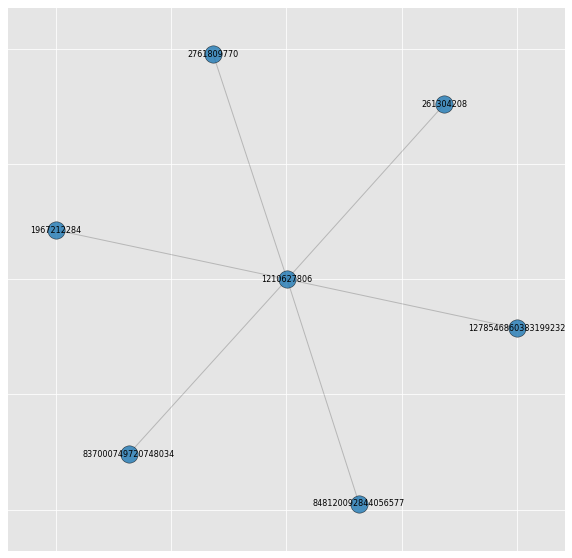

In [22]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 10))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos,
                               alpha=0.8)
nodes.set_edgecolor('k')
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

In [23]:
import networkx as nx 
import matplotlib.pyplot as plt
from numpy import vectorize 
from sklearn.feature_extraction.text import TfidfVectorizer

Please enter your Tweet
Covid-19 are likely to increase in summer 2022 as people go for vacation

We can fight together against covid
-> Recent data on #COVID19 vaccine effectiveness show that COVID-19 vaccines provide substantial protection against COVID-19, including severe illness, hospitalization, and death.
- Anonymous Twitter

-> CDC expands #COVID19 booster recommendations to 16-and-17-year-olds.
- Anonymous Twitter

-> New @CDCMMWR show Moderna & Pfizer-BioNtech #COVID19 vaccines helped protect older US veterans against #COVID19 hospitalization 4+ mos. after 2nd dose.
- Anonymous Twitter

-> Everyone ages 18+ years who got a #COVID19 vaccine should get a booster shot.
- Anonymous Twitter

-> To get the most protection against COVID-19 and flu this season, make sure you get vaccinated against both #COVID19 AND #flu. You can get both shots at the same visit if the timing coincides!
- Anonymous Twitter

-> I’m fully vaccinated against #COVID19 because I know it helps protect my fa

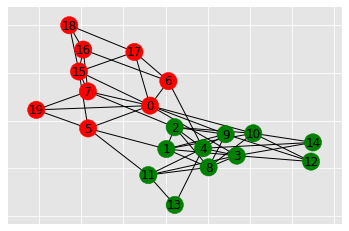

In [25]:



def plot_graph(G):
    color_map = []

    for i in G.nodes:
        if G.nodes[i]['positive']:
            color_map.append('green')
        else:
            color_map.append('red')

    nx.draw_networkx( G, 
            node_color=color_map, 
            pos=nx.spring_layout(G, iterations=1000), 
            arrows=False, with_labels=True )
    plt.show()



def show_suggestions(G,condition):
    print("")
    if(condition):
        print("We can fight together against covid")
        for i in G.nodes:
            if G.nodes[i]['positive'] == condition:
                print("-> " + G.nodes[i]['data'])
                print("- Anonymous Twitter")
                print("")
        
    else:
        print("Keep going and spread positivity")
        




def analysedata(G,input_string):
    text1=[]
    text2=[]
    for i in G.nodes:
        if G.nodes[i]['positive']:
            text1.append(G.nodes[i]['data'])
        else:
            text2.append(G.nodes[i]['data'])
    vectorizer1 = TfidfVectorizer()
    vectorizer1.fit(text1)
    vectorizer2 = TfidfVectorizer()
    vectorizer2.fit(text2)
    vector1 = vectorizer1.transform([input_string])
    vector2 = vectorizer2.transform([input_string])
    if(vector1.toarray().sum()>vector2.toarray().sum()):
        return 0
    return 1


print("Please enter your Tweet")
st = input()
G = nx.read_gml("C:/Users/MADHAVI/Downloads/ritanshu prjt/set.gml", label = 'id')
con = analysedata(G, st)
# print(con)
show_suggestions(G, con)
v = input()
plot_graph(G)